# Nuvem de Palavras Twitter

In [0]:
# Instalação das bibliotecas
!pip install pandas --quiet
!pip install tweepy --quiet
!pip install wordcloud --quiet

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-88a244f4-5ffe-40ca-9154-4c00998e6a6b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-88a244f4-5ffe-40ca-9154-4c00998e6a6b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-88a244f4-5ffe-40ca-9154-4c00998e6a6b/bin/python -m pip install --upgrade pip' command.


In [0]:
# Importando as bibliotecas
import pandas as pd
import tweepy
import matplotlib.pyplot as plt

In [0]:
# Autenticação
bearer_token = 'xxxx'
client = tweepy.Client(bearer_token)

In [0]:
# Recuperando Tweets
response = client.search_recent_tweets("#SANB11", max_results=100)

In [0]:
# Imprimindo Tweets
tweets = response.data

for tweet in tweets:
    #print(tweet.id)
    print(tweet.text)

#MERCADOS: Santander cai com troca de posições no setor

As ações do Santander (#SANB11) registram a maior baixa do setor bancário no Ibovespa, com perda de 2,11% (R$ 28,27). Analistas dizem que os investidores estão migrando para os papéis do Banco do B… https://t.co/e1pfNuy1hA
Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11

Guidance do Banco do Brasil para 2022 e 2023 e comparação com o resultado reportado. https://t.co/EwbAcKAZCN
RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11

Guidance do Banco do Brasil para 2022 e…
RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11

Guidance do Banco do Brasil para 2022 e…
RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11

Guidance do Banco do Brasil para 2022 e…
RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11

Gu

In [0]:
# Agrupando os tweets em um dataframe
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['Texto'])
pd.options.display.max_colwidth = 130 
df.head()

,Texto
0,#MERCADOS: Santander cai com troca de posições no setor\n\nAs ações do Santander (#SANB11) registram a maior baixa do setor ba...
1,Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Brasil para 2022 ...
2,RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Bra...
3,RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Bra...
4,RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Bra...


In [0]:
# Agrupando os tweets em uma string única
string = pd.Series(df['Texto'].values).str.cat(sep=' ')
string

Out[14]: '#MERCADOS: Santander cai com troca de posições no setor\n\nAs ações do Santander (#SANB11) registram a maior baixa do setor bancário no Ibovespa, com perda de 2,11% (R$ 28,27). Analistas dizem que os investidores estão migrando para os papéis do Banco do B… https://t.co/e1pfNuy1hA Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Brasil para 2022 e 2023 e comparação com o resultado reportado. https://t.co/EwbAcKAZCN RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Brasil para 2022 e… RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Brasil para 2022 e… RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC4 #ITUB4 #SANB11\n\nGuidance do Banco do Brasil para 2022 e… RT @candremv: Comparativo de resultados dos 4 grandes bancos listados #BBAS3 #BBDC

In [0]:
# Removendo caracteres especiais
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

Out[15]: 'MERCADOS: Santander cai com troca de posições no setor\n\nAs ações do Santander (SANB11) registram a maior baixa do setor bancário no Ibovespa, com perda de 2,11% (R$ 28,27). Analistas dizem que os investidores estão migrando para os papéis do Banco do B… https://t.co/e1pfNuy1hA Comparativo de resultados dos 4 grandes bancos listados BBAS3 BBDC4 ITUB4 SANB11\n\nGuidance do Banco do Brasil para 2022 e 2023 e comparação com o resultado reportado. https://t.co/EwbAcKAZCN RT candremv: Comparativo de resultados dos 4 grandes bancos listados BBAS3 BBDC4 ITUB4 SANB11\n\nGuidance do Banco do Brasil para 2022 e… RT candremv: Comparativo de resultados dos 4 grandes bancos listados BBAS3 BBDC4 ITUB4 SANB11\n\nGuidance do Banco do Brasil para 2022 e… RT candremv: Comparativo de resultados dos 4 grandes bancos listados BBAS3 BBDC4 ITUB4 SANB11\n\nGuidance do Banco do Brasil para 2022 e… RT candremv: Comparativo de resultados dos 4 grandes bancos listados BBAS3 BBDC4 ITUB4 SANB11\n\nGuidan

In [0]:
# Ignorando classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["RT","SANB11", "BBS3", "VALE3", "PETR4", "ELET3", "MGLU3", "VIIA3", "BBAS3", "ITUB4" , 'BBDC4',"ITAÚ","por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc', 'mails'])

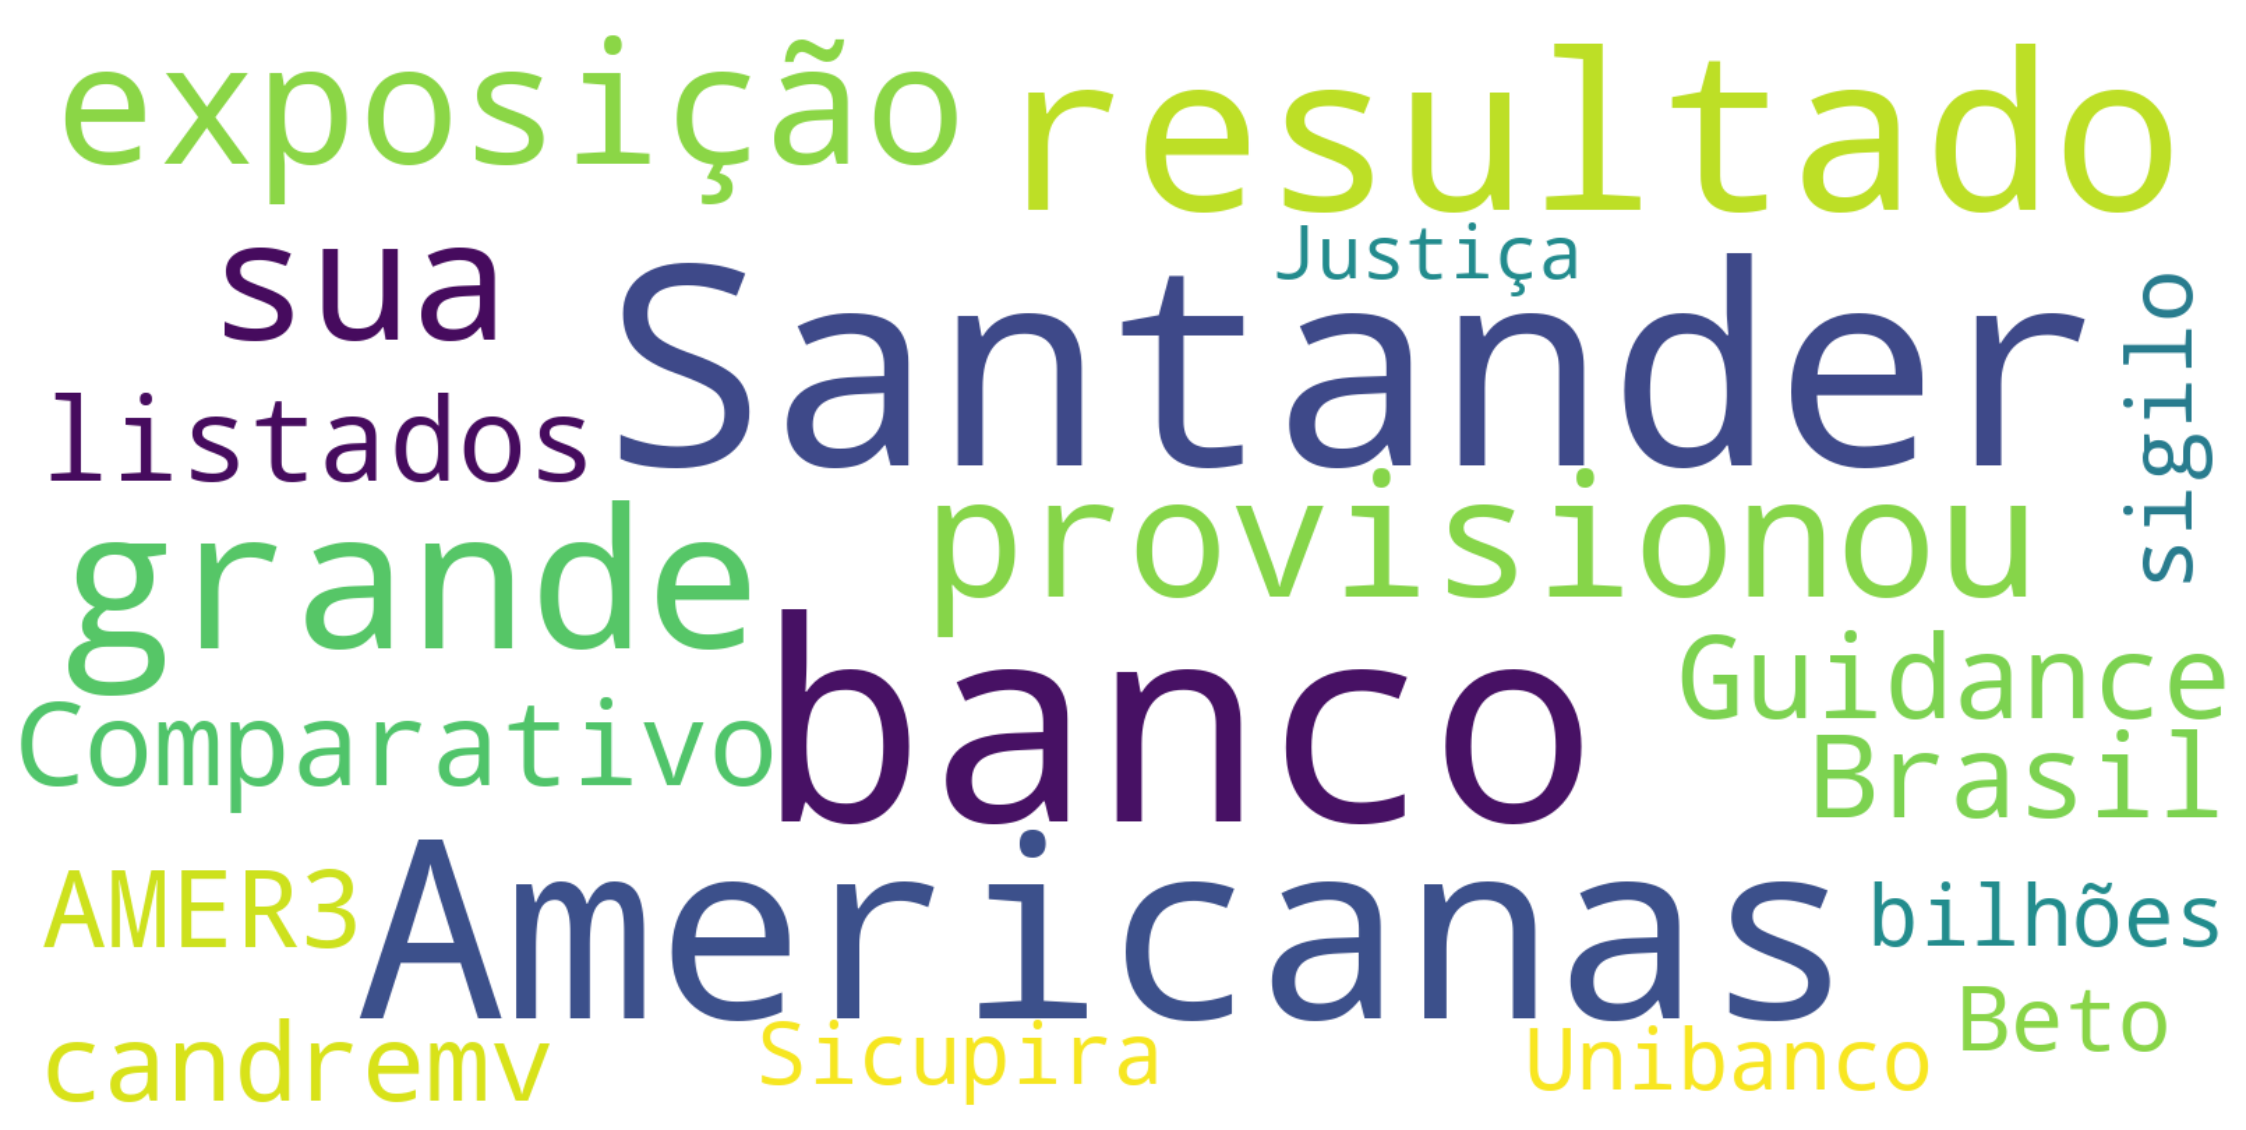

In [0]:
# Word Cloud com os textos dos tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=20,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()